In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 49.3 MB/s eta 0:00:00


In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()


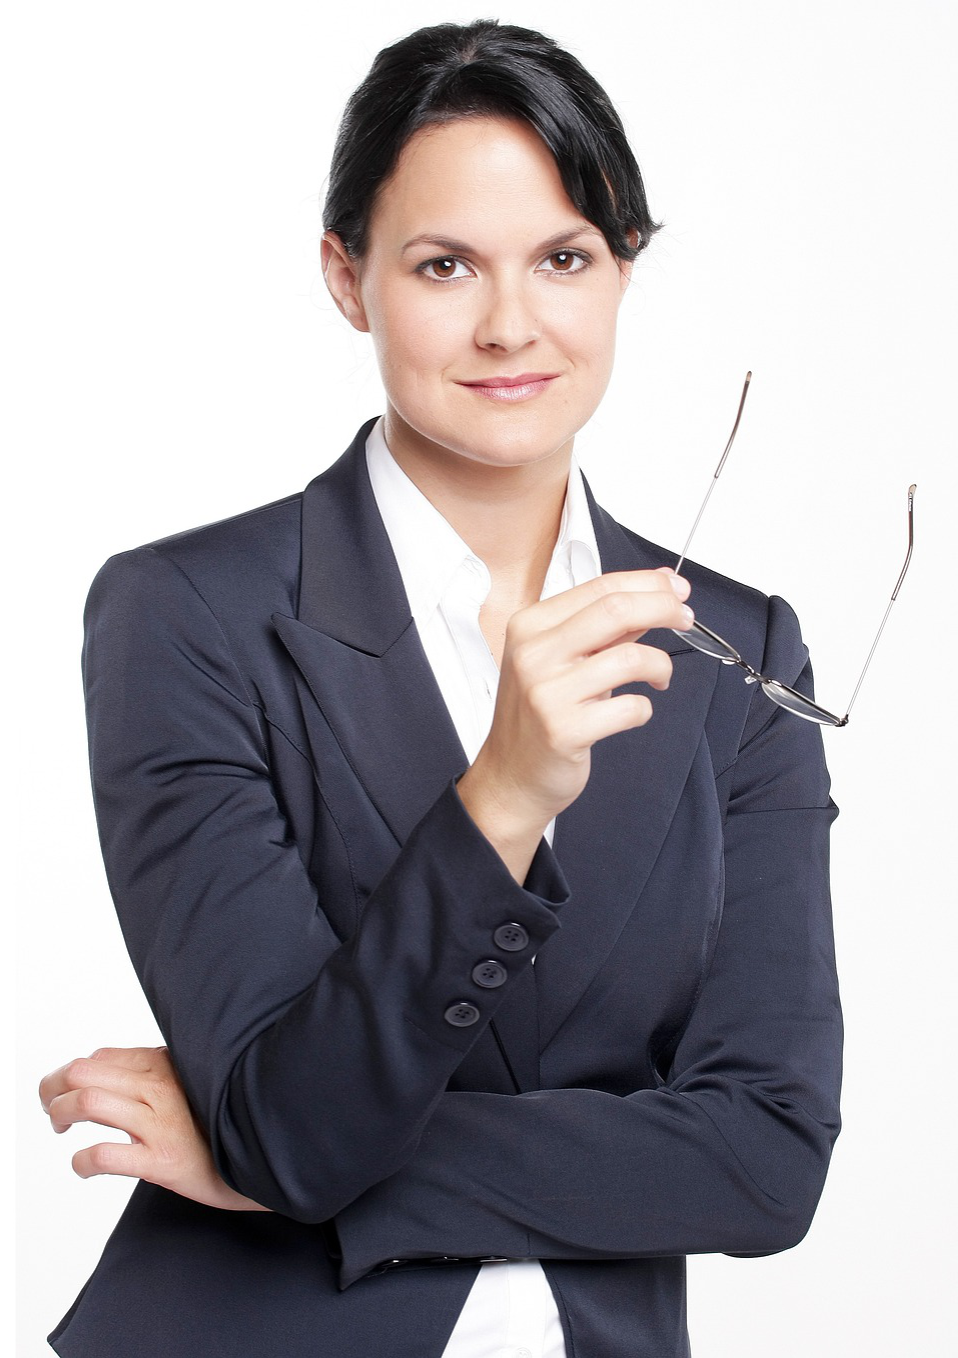

In [ ]:
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.png")
cv2_imshow(img)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)


In [ ]:
from google.colab import drive
import os
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow
from PIL import Image


drive.mount("/content/drive", force_remount=True)

folder_path = '/content/drive/MyDrive/droopy'

base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

Mounted at /content/drive


In [ ]:
def score_sum(detection_res):
  ratio=[]

  # img_path='/content/drive/MyDrive/droopy/b_22_300x277.jpg'
  # cv_matt = cv2.imread(img_path)
  # rgb_frm = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv_matt)
  # detection_res = detector.detect(rgb_frm)


  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in detection_res.face_blendshapes[0]]

  i=0
  sum1=0
  while i < len(detection_res.face_blendshapes[0]) - 1:
    if i in [0,3,6,23,24,25,26,27,32,33,38,39]:
      i+=1
      continue
    x=face_blendshapes_scores[i]/face_blendshapes_scores[i+1]

    # print(i,"...........",x)
    ratio.append(x)
    sum1=sum1+x
    i=i+2

  return sum1

  # annotated_img = draw_landmarks_on_image(cv2.cvtColor(rgb_frm.numpy_view(), cv2.COLOR_RGB2BGR), detection_res)
  # cv2_imshow(cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))
  # print(sum1)

In [ ]:
values=[]

val_arr={}
x=215
y=215
folder_path = '/content/drive/MyDrive/FacialParalysis_dataset'

if not os.path.exists(folder_path):
    print("Folder does not exist.")
else:
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(image_file
              )

        try:
          cv_mat = cv2.imread(image_path)
          rgb_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv_mat)

          sizee = Image.open(image_path)


          width, height = sizee.size
          print(width, height)
          # if height<y:
          #   y=height
          # if width<x:
          #   x=width

          # detection_result = detector.detect(rgb_frame)
          # # values.append(detection_result)

          # scores=score_sum(detection_result)

          # # values.append(scores)

          # val_arr[image_file]=scores

          # annotated_image = draw_landmarks_on_image(cv2.cvtColor(rgb_frame.numpy_view(), cv2.COLOR_RGB2BGR), detection_result)

          # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
        except Exception as e:
          print(f"Error processing {image_file}: {str(e)}")

print(len(val_arr))
print(x, y)

In [ ]:
# save labeled images in drive

def label(val_arr):
  for (j,k) in enumerate(val_arr):
    read_img=cv2.imread(folder_path+'/'+k)
    if val_arr[k]<50:
      filename="mild"
    elif val_arr[k]<500:
      filename="moderately_severe"
    else:
      filename="severe"
    filename="/content/drive/MyDrive/labeled_FacialParalmysis/"+filename+"_"+str(j)+".jpg"
    cv2.imwrite(filename,read_img)

label(val_arr)

NameError: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

annotated_image = draw_landmarks_on_image(cv2.cvtColor(rgb_frame.numpy_view(), cv2.COLOR_RGB2BGR), values[-1])
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
# values[0].face_blendshapes

In [ ]:
len(detection_result.face_landmarks[0])

In [ ]:
detection_result.face_blendshapes[0][0]

In [ ]:
# plot_face_blendshapes_bar_graph(values[0].face_blendshapes[0])

In [ ]:
print(detection_result.facial_transformation_matrixes)

In [ ]:
import os
from PIL import Image

data_dir = "/content/drive/MyDrive/labeled_FacialParalysis/"
output_directory = "/content/drive/MyDrive/FacialParalysis_dataset/"
image_filenames = []
labels = []

newsize= (215,215)

for filename in os.listdir(output_directory):
    if filename.endswith(".jpg"):
        label = filename.split("_")[0]
        labels.append(label)
        image_filenames.append(filename)
        # image = Image.open(os.path.join(output_directory, filename))


# Print the first few labels and their corresponding filenames
for i in range(5):
    print("Label:", labels[i], "Filename:", image_filenames[i])


Label: moderately Filename: moderately_severe_40.jpg
Label: mild Filename: mild_41.jpg
Label: mild Filename: mild_42.jpg
Label: moderately Filename: moderately_severe_43.jpg
Label: moderately Filename: moderately_severe_44.jpg


In [ ]:
from glob import glob
import numpy as np


image_path_arr=glob("/content/drive/MyDrive/FacialParalysis_dataset/*")
# print(image_path_arr)


num_arr=np.array(image_path_arr)
np.random.shuffle(num_arr)
split_size = 900

train_set = num_arr[:split_size]
test_set = num_arr[split_size:]

print(len(test_set))

120


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
class_label = ["mild", "moderately", "severe"]
class Dataset(Dataset):
    def __init__(self,dp,label,transform_img=None):
      self.label = label
      self.transform_img = transform_img
      self.dp = dp
    def __len__(self):
      return len(self.dp)
    def __getitem__(self,i):
      labelsss = np.array([0.0,0.0,0.0])
      image_path = self.dp[i]
      filename = image_path.split("/")[-1]
      label = filename.split("_")[0]
      for i, element in enumerate(class_label):
        if element == label:
            break
      labelsss[i] = 1.0
      img = Image.open(image_path)
      # img = Image.open(urllib.request.urlretrieve(image_url))
      # print(img.size)
      if self.transform_img:
          img = self.transform_img(img)
      labelsss = torch.from_numpy(labelsss)

      return img , labelsss

BATCH_SIZE = 16
transformationImage = transforms.Compose(
    [
        transforms.Grayscale(),
        transforms.Resize((128,128)),
        transforms.ToTensor(),

#         transforms.RandomHorizontalFlip(),
         # Scales data into [0,1]
        # transforms.Lambda(lambda t: (t * 2) - 1),

    ]
)


train_data = Dataset(train_set,labels, transform_img=transformationImage)
dataloader_train = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

test_data = Dataset(test_set,labels, transform_img=transformationImage)
dataloader_test = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)


# print(dataloader_train)
print(train_data[25])

(tensor([[[0.4549, 0.4627, 0.4353,  ..., 0.3333, 0.3882, 0.2745],
         [0.4510, 0.4392, 0.4235,  ..., 0.3059, 0.4039, 0.3490],
         [0.4078, 0.3922, 0.4078,  ..., 0.2863, 0.3647, 0.3569],
         ...,
         [0.4824, 0.6196, 0.6745,  ..., 0.6431, 0.6118, 0.6118],
         [0.5843, 0.5725, 0.4078,  ..., 0.6353, 0.6196, 0.6196],
         [0.4392, 0.2549, 0.2471,  ..., 0.6157, 0.6235, 0.6314]]]), tensor([1., 0., 0.], dtype=torch.float64))


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class FacialParalysisAssessment(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(1, 32, kernel_size = 3, padding = 1),
            # nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            # nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            # nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            # nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            # nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1),
            # nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(65536,1024),
            # nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            # nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Linear(512,3)
        )

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = FacialParalysisAssessment()
output = model(train_data[0][0].view(1,1,128,128))


In [ ]:
print(output)
print(train_data[0][0].shape)

tensor([[-0.0070, -0.0271, -0.0490]], grad_fn=<AddmmBackward0>)
torch.Size([1, 128, 128])


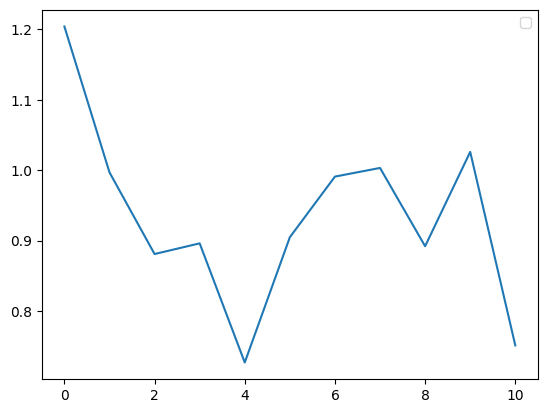

In [ ]:
from torch.optim import Adam
import torch
from IPython.display import clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "GPU"
model.to(device)
optimizer = Adam(model.parameters(),lr=0.005)
epochs = 11
loss_values = []
criterion = nn.CrossEntropyLoss()
len_train = len(train_data)

for epoch in range(epochs):
    correct = 0
    for image,label in tqdm(dataloader_train):
        optimizer.zero_grad()

        # loss.backward()
        # optimizer.step()
        # print(image.shape, len(label))
        out = model(image.to(device))
        out = out.type(torch.FloatTensor)
        out = out.to(device)


        label = label.type(torch.FloatTensor)
        label = label.to(device)
        # label = torch.tensor(label)
        # print(out, label)
        loss = criterion(out, label)
        loss.backward()
        optimizer.step()
        # correct += (torch.argmax(out,32)==label).sum().item()
    # accuracy = correct/len_train
    # print(epoch, accuracy)
    loss_values.append(loss.item())
    clear_output(wait = True)
    plt.plot(loss_values)
    plt.legend()
    plt.show()